# 시험장 환경 정보

Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|

In [1]:
# 실행 환경 확인

import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import mlxtend
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1


In [2]:
# 시각화 모듈 설정
# 참고용 차트를 출력하기 위함
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 문제 개요

삼성전자 A공장은 전기료 효율화를 통한 원가절감 방안을 찾고 있다. 

공장 가동 시 일시적인 과부하로 최대수요전력이 증가하면 불리한 기본요금이 산정되고 이는 원가상승 요인이 된다. 

전기 요금은 최대수요전력을 바탕으로 시간 단위로 산정된다. 

최대수요전력을 예측하여 선제적으로 원가상승에 대응하고자 한다.

당일 데이터를 바탕으로, 그 다음 날의 최대수요전력을 예측하는 모델을 개발한다.

보유한 데이터는 A공장에서 2021년 1월 1일 ~ 2021년 9월 14일 (9개월) 동안 변압기에 감지센서를 부착하여

15분 단위로 최대수요전력을 관측한 데이터이다. 

데이터는 2종류이며, ‘elec.csv’ 데이터는 최대수요전력을 측정한 데이터이며, 

'info.csv' 데이터는 측정 당시 기상정보 및 생산량과 인건비율 등의 정보가 포함되어 있다. 


- 데이터 파일: elec.csv (24,642 rows, 4 columns, 데이터셋명-elec)

|변수명|내용|타입|
|------|:--|----|
|Date|측정  날짜|문자열|
|DateHour|측정 날짜와 시간|문자열|
|Minute|15분 간격으로 측정<br/>(15분, 30분, 45분, 60분)|문자열|
|Value|최대수요전력(피크전기 사용량)<br/> 최대수요전력이란 공장 내 설치된 변압기를 통해<br/>일정 시간 단위로 누적 계산되는 전력을 의미|정수형|

- 데이터 파일: info.csv (6,168 rows, 9 columns, 데이터셋명-info)

|변수명|내용|타입|
|----|:--|-----|
|Date|측정 날짜와 시간|문자열|
|생산량|해당 시점에 생산해야 할 생산량|정수형|
|기온|해당 시점의 기온|실수형|
|풍속|해당 시점의 풍속|실수형|
|습도|해당 시점의 습도|정수형|
|강수량|해당 시점의 강수량|실수형|
|전기요금(계절)|해당시점의 전기요금|실수형|
|공장인원|해당 시점에 공장이 보유한 생산력|실수형|
|인건비|야간 및 주간 인건비에 대한 비율값|실수형|

In [5]:
df_elec = pd.read_csv('elec.csv', parse_dates=['Date', 'DateHour'])
df_elec

,Date,DateHour,Minute,Value
0,2021-01-01 00:15:00,2021-01-01 00:00:00,15분,62
1,2021-01-01 00:30:00,2021-01-01 00:00:00,30분,61
2,2021-01-01 00:45:00,2021-01-01 00:00:00,45분,61
3,2021-01-01 01:00:00,2021-01-01 00:00:00,60분,61
4,2021-01-01 01:15:00,2021-01-01 01:00:00,15분,96
...,...,...,...,...
24667,2021-09-14 23:00:00,2021-09-14 22:00:00,60분,114
24668,2021-09-14 23:15:00,2021-09-14 23:00:00,15분,117
24669,2021-09-14 23:30:00,2021-09-14 23:00:00,30분,119
24670,2021-09-14 23:45:00,2021-09-14 23:00:00,45분,112


In [6]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 4 columns):
Date        24672 non-null datetime64[ns]
DateHour    24672 non-null datetime64[ns]
Minute      24672 non-null object
Value       24672 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 771.1+ KB


In [7]:
df_info = pd.read_csv('info.csv')
df_info

,Date,생산량,기온,풍속,습도,강수량,전기요금(계절),공장인원,인건비
0,2021-01-01 00:00:00,0,-3.2,2.4,71,0.0,109.8,0.000000,1.5
1,2021-01-01 01:00:00,0,-4.5,1.5,77,0.0,109.8,0.000000,1.5
2,2021-01-01 02:00:00,0,-3.9,2.6,58,0.0,109.8,0.000000,1.5
3,2021-01-01 03:00:00,0,-4.1,2.6,56,0.0,109.8,0.000000,1.5
4,2021-01-01 04:00:00,0,-4.6,2.6,60,0.0,109.8,0.000000,1.5
...,...,...,...,...,...,...,...,...,...
6163,2021-09-14 19:00:00,1497,21.7,3.6,85,9.4,167.2,2.442088,1.5
6164,2021-09-14 20:00:00,45,22.2,4.2,78,9.4,167.2,0.087891,1.5
6165,2021-09-14 21:00:00,149,22.2,4.3,76,9.4,167.2,0.290448,1.5
6166,2021-09-14 22:00:00,66,22.0,2.5,79,9.4,167.2,0.148984,1.5


In [10]:
df_info['Date'] = pd.to_datetime(df_info['Date'])

In [11]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 9 columns):
Date        6168 non-null datetime64[ns]
생산량         6168 non-null int64
기온          6168 non-null float64
풍속          6165 non-null float64
습도          6168 non-null int64
강수량         6167 non-null float64
전기요금(계절)    6168 non-null float64
공장인원        6151 non-null float64
인건비         6168 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 433.8 KB


# 전처리(Preprocessing)

데이터를 분석하기 위하여 다음에 안내된 순서대로 데이터를 가공하시오.

## 단계 1 

데이터셋 elec를 이용하여 다음 그림과 같이 재구성하시오.


 ̵ 최대수요전력 (Value)을 시간당 15분 간격으로 관측하여 얻은 4번의 결과 
 
 ̵ DateHour 변수 기준으로 시간당 한 행에 4번 측정결과가 나오도록 재구성함.
 
 ̵ 재구성된 데이터셋은 elec1로 표기(6,168 rows, 5 columns)

|DateHour|15분|30분|45분|60분|
|--------|----|----|----|----|
|2021-01-01 00:00:00|62|61|61|61|
|2021-01-01 01:00:00|96|93|116|113|
|2021-01-01 02:00:00|106|96|106|107|
|2021-01-01 03:00:00|92|110|110|109|
|2021-01-01 04:00:00|108|105|106|108|


In [17]:
# Unstack을 이용한 방법
df_elec1 = df_elec.set_index(['DateHour', 'Minute'])['Value'].unstack()
df_elec1.head()

Minute,15분,30분,45분,60분
DateHour,,,,
2021-01-01 00:00:00,62,61,61,61
2021-01-01 01:00:00,96,93,116,113
2021-01-01 02:00:00,106,96,106,107
2021-01-01 03:00:00,92,110,110,109
2021-01-01 04:00:00,108,105,106,108


In [19]:
# pivot을 이용한 방법, DateHour, Minute에 대해서 중복 발생이 없어 성립합니다. 
# 중복이 발생할 경우 집계 작업이 되는 것이고 pivot_table을 aggfunc으로 집계를 정의 하여 사용합니다.
df_elec.pivot(index='DateHour', columns='Minute', values='Value')

Minute,15분,30분,45분,60분
DateHour,,,,
2021-01-01 00:00:00,62,61,61,61
2021-01-01 01:00:00,96,93,116,113
2021-01-01 02:00:00,106,96,106,107
2021-01-01 03:00:00,92,110,110,109
2021-01-01 04:00:00,108,105,106,108
...,...,...,...,...
2021-09-14 19:00:00,152,151,171,139
2021-09-14 20:00:00,124,130,128,130
2021-09-14 21:00:00,134,130,125,124


## 단계 2

데이터셋 elec1의 DateHour 변수를 이용하여 아래의 파생변수를 생성한다.

̵ 요일명(DayName): DateHour 변수에서 요일명을 숫자로 추출, 0(월)~6(일)으로 반환

̵ 시간(Hour): DateHour 변수에서 시간 추출

̵ 오전/오후(AM): 생성한 시간(Hour) 변수를 기준으로 

 12시 전( < 12:00)은 오전(0), 이후(>= 12:00)는 오후(1)로 표기, 이때 표기는 숫자 0, 1로 표기
 
̵ 주말유무(Weekend_yn): 생성한 요일명(DayName) 변수를 이용하여 5,6이면 1(주말), 그외는 0(평일) 로 표기

̵ 공휴일(Holiday_yn): 다음은 공휴일 목록임

  ["2021-01-01", "2021-02-11", "2021-02-12", "2021-03-01", "2021-05-05", "2021-05-19", "2021-08-16"], 

  목록에 해당하면 1, 아니면 0로 표기한다. DateHour의 일자를 기준으로 판별한다.
 
̵ 최대수요전력 평균(Avg): 시간당 15분 간격(15분, 30분, 45분, 60분)으로 측정한 최대수요전력 (Value)의 평균값

̵ 최대수요전력 합계(TotalHour): 시간당 15분 간격(15분, 30분, 45분, 60분)으로 측정한 최대수요전력 (Value)의 총합

In [58]:
holi = pd.to_datetime(
    ["2021-01-01", "2021-02-11", "2021-02-12", "2021-03-01", "2021-05-05", "2021-05-19", "2021-08-16"]
).date # 일자의 비교여서 일자 형식으로 맞춰 줍니다
min_cols = ['15분', '30분', '45분', '60분']
df_elec1 = df_elec1.assign(
    DayName = df_elec1.index.weekday,
    Hour = df_elec1.index.hour,
    AM = (df_elec1.index.hour >= 12).astype(int),
    Weekend_yn = df_elec1.index.weekday.isin([5, 6]).astype(int),
    Holiday_yn = np.isin(df_elec1.index.date, holi).astype(int), # numpy 형식이니 np.isin을 씁니다
    Avg = df_elec1[min_cols].mean(axis=1),
    TotalHour = df_elec1[min_cols].sum(axis=1),
)

In [42]:
df_elec1

Minute,15분,30분,45분,60분,DayName,Hour,AM,Weekend_yn,Holiday_yn,Avg,TotalHour
DateHour,,,,,,,,,,,
2021-01-01 00:00:00,62,61,61,61,4,0,0,False,1,61.25,245
2021-01-01 01:00:00,96,93,116,113,4,1,0,False,1,104.50,418
2021-01-01 02:00:00,106,96,106,107,4,2,0,False,1,103.75,415
2021-01-01 03:00:00,92,110,110,109,4,3,0,False,1,105.25,421
2021-01-01 04:00:00,108,105,106,108,4,4,0,False,1,106.75,427
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14 19:00:00,152,151,171,139,1,19,1,False,0,153.25,613
2021-09-14 20:00:00,124,130,128,130,1,20,1,False,0,128.00,512
2021-09-14 21:00:00,134,130,125,124,1,21,1,False,0,128.25,513


## 단계 3
    
info데이터셋에 결측치가 존재한다. 이 때 발생된 결측치들은 0으로 변경하시오. 

- 풍속, 강수량은 바람이 불지 않는 경우, 비가 오지 않는 경우 기록되지 않는 경우가 존재함, 이는 0의 의미임

- 공장인원의 경우 생산량이 없다던가 인력이 필요하지 않은 경우 기록되지 않는 경우가 존재함, 이는 0의 의미임

- 결측치를 처리한 후 데이터셋명은 info1로 표기함


In [45]:
df_info1 = df_info.fillna(0)
df_info1.isna().sum()

Date        0
생산량         0
기온          0
풍속          0
습도          0
강수량         0
전기요금(계절)    0
공장인원        0
인건비         0
dtype: int64

## 단계 4

elec1와 info1 데이터프레임을 결합하시오. 

결합 시 elec1데이터셋 에서는 DateHour 변수, info1데이터셋 에서는 Date 변수를 기준으로 inner join하시오.


- elec1 데이터셋에 info1을 데이터셋 결합
 
- 결합 방식: inner join, elec1.DateHour == info1.Date
 
- 결합 후 Date와 DateHour 같다. 두 변수를 이름을 DateHour 하여 하나만 남긴다.
 
- 결합 후 생성된 데이터셋명 basetable1로 표기(6,168 rows, 20 columns)


In [63]:
# merge 를 이용한 방법입니다: 기준 컬럼 설정 - left_on: caller의 컬럼, right_on: callee의 컬럼
df_basetable1 = df_elec1.merge(df_info1, left_on='DateHour', right_on='Date', how='inner')\
        .rename(columns={'Date': 'DateHour'}).set_index('DateHour')
df_basetable1.head()

,15분,30분,45분,60분,DayName,Hour,AM,Weekend_yn,Holiday_yn,Avg,TotalHour,생산량,기온,풍속,습도,강수량,전기요금(계절),공장인원,인건비
DateHour,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,62,61,61,61,4,0,0,0,1,61.25,245,0,-3.2,2.4,71,0.0,109.8,0.0,1.5
2021-01-01 01:00:00,96,93,116,113,4,1,0,0,1,104.50,418,0,-4.5,1.5,77,0.0,109.8,0.0,1.5
2021-01-01 02:00:00,106,96,106,107,4,2,0,0,1,103.75,415,0,-3.9,2.6,58,0.0,109.8,0.0,1.5
2021-01-01 03:00:00,92,110,110,109,4,3,0,0,1,105.25,421,0,-4.1,2.6,56,0.0,109.8,0.0,1.5
2021-01-01 04:00:00,108,105,106,108,4,4,0,0,1,106.75,427,0,-4.6,2.6,60,0.0,109.8,0.0,1.5


In [ ]:
# join: callee의 Index를 기준으로 합니다.
df_basetable1 = df_elec1.join(df_info1.set_index('Date'), how='inner')
df_basetable1.head()

# 문제 1 ( ~ 10:00)

basetable1을 이용하여 다음 질문에 답하시오.

## 단계 1-1

시간당 최대수요전력 합계(TotalHour)의 최대값과 최소값이 차이를 구하고, 이 값을 A라고 한다.

In [70]:
mx, mn = df_basetable1['TotalHour'].agg(['max', 'min'])
A = mx - mn
A

830

## 단계 1-2 

일별로 시간당 최대수요전력 합계(TotalHour)의 최대값을 찾아 최대값이 빈번하게 발생하는 시간을 찾고자 한다.

일별로 최대수요전력 합계(TotalHour)의 최대값이 첫 번째로 빈번하게 발생하는 시간(Hour)을 B, 

두 번째로 빈번하게 발생하는 시간(Hour)을 C라고 한다. 

하루에 최대값에 해당하는 시간(Hour)이 여러 번 나올 수 있음을 고려하라.

In [106]:
# Transform을 이용한 방법입니다.
B, C = df_basetable1.loc[
    df_basetable1.groupby(df_basetable1.index.date)['TotalHour'].transform(lambda x: x == x.max()),
    'Hour'
].value_counts().iloc[:2].index
B, C

(8, 11)

In [105]:
# Apply를 이용하는 방법입니다
B, C = df_basetable1.loc[
    df_basetable1.groupby(df_basetable1.index.date)['TotalHour'].apply(lambda x: x == x.max()),
    'Hour'
].value_counts().iloc[:2].index
B, C

(8, 11)

## 단계 1-3

일별 기준(DateHour 변수 사용)으로 시간당 최대수요전력 합계(TotalHour) 의 범위(최대값-최소값)가 가장 큰 값을 찾고 

이 값을 D라고 한다.

In [88]:
# Agg를 이용한 방법입니다
D = df_basetable1.groupby(df_basetable1.index.date)['TotalHour'].agg(lambda x: x.max() - x.min()).max()
D

706

In [91]:
# Apply을 이용한 방법 입니다.
D = df_basetable1.groupby(df_basetable1['Weekend_yn'])['TotalHour'].apply(lambda x: x.max() - x.min()).max()
D

706

## 단계 1-4

공휴일과 주말을 제외한 평일 데이터만 추출을 한 후, 

일별 기준으로 시간당 최대수요전력 합계(TotalHour)의 범위(최대값-최소값)가 가장 큰 일자의 요일명(DayName)을 E라고 한다.



In [100]:
df_tmp = df_basetable1.loc[
    (df_basetable1[['Weekend_yn', 'Holiday_yn']] == 0).all(axis=1)
]
E = df_tmp.groupby(df_tmp.index.date)['TotalHour'].agg(lambda x: x.max() - x.min()).idxmax().weekday()
E

0

In [101]:
# pipe를 통해 임시 테이블을 만들지 않는 방법입니다.
df_basetable1.loc[
    (df_basetable1[['Weekend_yn', 'Holiday_yn']] == 0).all(axis=1)
].pipe(
    lambda x: x.groupby(x.index.date)['TotalHour'].agg(lambda x: x.max() - x.min()).idxmax().weekday()
)

0

In [102]:
A, B, C, D, E, A + B + C + D + E

(830, 8, 11, 706, 0, 1555)

A + B + C + D + E를 적으시오.

**1555**

# 문제 2 ~ 11:15

최대수요전력 평균(Avg) 값이 오전/오후에 따라 차이가 있는지 검정하시오.

##  단계 2-1

basetable1 에서 공휴일과 주말을 제외하고 prob2 데이터프레임을 만든다. 

- prob2에서 시간(Hour)이 8과 11사이 (8, 11 포함) 또는 13과 16 (13, 16 포함) 사이의 행들만 남긴다.

- prob2에서 Avg가 130이상인 행들만을 남긴다.

Hint] 최종 1233개 행만 남는다.


In [116]:
df_prob2 = df_basetable1.loc[
    ~(df_basetable1[['Weekend_yn', 'Holiday_yn']] == 1).any(axis=1)
].copy()

In [117]:
df_prob2 = df_prob2.query(
    '((Hour >= 8 and Hour <= 11) or (Hour >= 13 and Hour <= 16)) and Avg >= 130'
).copy()
len(df_prob2)

1233

## 단계 2-2

오전(AM = 0) 인 행들을 대상으로 Avg에 대하여 Shapiro-Wilk 검정을 사용하여 정규성 검정한다. 

검정 결과에서 p-value를 A라고 한다.

---
**함수가이드**

scipy.stats 제공 기능 활용

문제 지시사항 외 Default 값 사용

---

In [120]:
from scipy.stats import shapiro
result_2_2 = shapiro(df_prob2.loc[df_prob2['AM'] == 0, 'Avg'])
A = result_2_2.pvalue
result_2_2, A

(ShapiroResult(statistic=0.9945228695869446, pvalue=0.026428762823343277),
 0.026428762823343277)

## 단계 2-3

오후(AM = 1) 인 행들을 대상으로 Avg에 대하여 Shapiro-Wilk 검정을 사용하여 정규성 검정한다. 

검정 결과에서 p-value를 B라고 한다.

In [121]:
result_2_3 = shapiro(df_prob2.loc[df_prob2['AM'] == 1, 'Avg'])
B = result_2_3.pvalue
result_2_3, B

(ShapiroResult(statistic=0.9950335025787354, pvalue=0.043661389499902725),
 0.043661389499902725)

## 단계 2-4

오전/오후에 따라 Avg의 모평균에 차이가 있는지 검정을 한다.

검정 방법은 T-검정을 사용하며, Bartlett 검정을 하고 결과를 T-검정 시 반영한다(유의 수준 5%). 

검정 결과에서 검정통계량의 절대값을 C라고 한다.

---
**함수가이드**

scipy.stats 제공 기능 활용

문제 지시사항 외 Default 값 사용

---


In [129]:
from scipy.stats import ttest_ind, bartlett

# 등분산 검정을 통해, 두 샘플의 분산이 같은지를 검증
equal_var = bartlett(
    df_prob2.loc[df_prob2['AM'] == 0, 'Avg'],
    df_prob2.loc[df_prob2['AM'] == 1, 'Avg']
).pvalue >= 0.05
# T-검정 수행
result_2_4 = ttest_ind(
    df_prob2.loc[df_prob2['AM'] == 0, 'Avg'],
    df_prob2.loc[df_prob2['AM'] == 1, 'Avg'],
    equal_var = equal_var
)
C = abs(result_2_4.statistic)
equal_var, result_2_4, C

(True,
 Ttest_indResult(statistic=8.27772409322812, pvalue=3.2348808563995005e-16),
 8.27772409322812)

## 단계 2-5

단계 2-2와 2-3의 검정 결과를 바탕으로, 단계 2-4의 T-검정의 가정을 만족한다면 D 값을 1 아니면 0으로 한다. (유의 수준을 5%)

In [146]:
# T 검정의 가정은 '두 샘플이 정규분포를 따른다'입니다. 유의 수준 5%라면 2-2와 2-3이 결과에서 두 샘플이 정규성이 기각됩니다.
D = 0
D

0

## 단계 2-6

오전/오후에 따라 Avg를 구분하여 Mann-Whitney U 검정을 하라. 검정 결과 pvalue을 E값으로 한다. 대립 가설은 '오전의 Avg와 오후의 Avg의 중앙값은 같지 않다' 입니다.

---
**함수가이드**

scipy.stats.mannwhitneyu, alternative를 문제 요건에 반드시 맞추어 설정합니다.

문제 지시사항 외 Default 값 사용

---


In [136]:
from scipy.stats import mannwhitneyu
result_2_6 = mannwhitneyu(
    df_prob2.loc[df_prob2['AM'] == 0, 'Avg'],
    df_prob2.loc[df_prob2['AM'] == 1, 'Avg'],
    alternative='two-sided' # Default가 alternative None입니다. 양측 검정을 요구하고 있으므로 two-sided 입니다
)
E = result_2_6.pvalue
result_2_6, E

(MannwhitneyuResult(statistic=239777.5, pvalue=1.7651446950415425e-15),
 1.7651446950415425e-15)

In [137]:
A, B, C, D, E, A + B + C + D + E

(0.026428762823343277,
 0.043661389499902725,
 8.27772409322812,
 0,
 1.7651446950415425e-15,
 8.347814245551367)

A + B + C + D + E를 소수점 넷째 자리에서 반올림하여 셋째 자리까지 적으시오

**8.348**

## 단계 2-7, Optional

Avg에 대하여 AM, DayName 두 범주에 대하여 이원산 분산분석(Two-way ANOVA)을 수행하고 상호작용항의 검정통계량을 구하라.

---
**함수가이드**

statsmodels.formula.api.ols

statsmodels.api.stats

문제 지시사항 외 Default 값 사용

---

In [147]:
del C # C를 사용하고 있으면 formula에 영향을 미치므로, 해제

NameError: name 'C' is not defined

In [145]:
from statsmodels.formula.api import ols
from statsmodels.api import stats

lm = ols('Avg ~ C(AM) + C(DayName) + C(AM):C(DayName)', data=df_prob2).fit()
# 위의 식을 다음과 같이 축약할 수 있습니다.
# lm = ols('Avg ~ C(AM)*C(DayName)', data=df_prob2).fit()
# 자세한 내용은 보충자료: statsmodels 편을 참조하시면 됩니다.
stats.anova_lm(lm).loc['C(AM):C(DayName)', 'F']

0.11962510466270143

## 문제 3 


DateHour를 기준으로 다음날 같은 시각의 최대전력사용량을 예측하려고 한다.


## 단계 3-1 

basetable1에 아래 그림과 같이, DateHour를 기준으로 다음날 같은 시각의 TotalHour를 이용하여 파생 변수 target을 생성한다. 

target에 결측치가 있는 행은 모두 제거하여 prob3 데이터셋을 만든다.

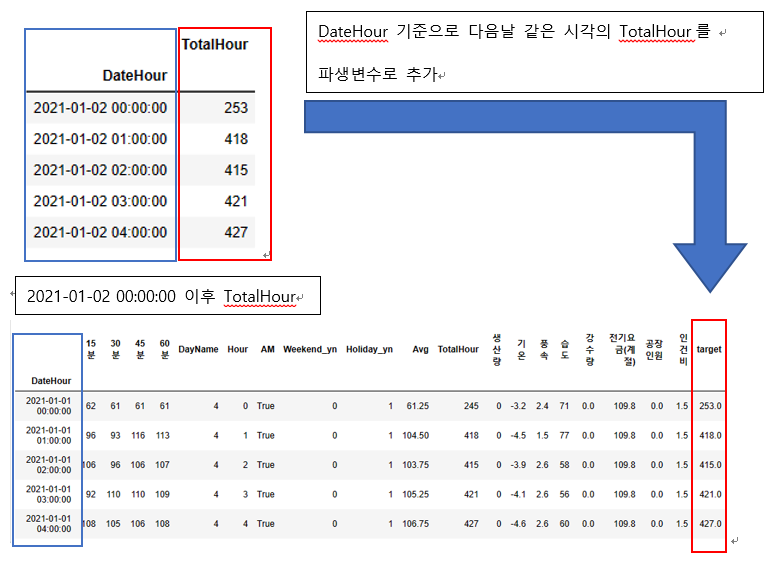

In [155]:
# 방법1: shift -24,  
# 시간별로 정렬이 된 상태이고, 하루에 24개씩 데이터가 있으므로, 
# shift(-24) 연산은 전날의 동일한 시간의 값을 취하게 되는 겁니다.
# 연산이 성립하기 위해서는 모든 일자에 대해서 24개의 행으로 구성되어야 합니다
(pd.Series(df_basetable1.index.date).value_counts() != 24).sum()

0

In [217]:
# 또한 중간에 빠진 날자가 있으면 안 됩니다
pd.Series(df_basetable1.index.strftime('%Y-%m')).value_counts() / 24

2021-03    31.0
2021-08    31.0
2021-07    31.0
2021-05    31.0
2021-01    31.0
2021-06    30.0
2021-04    30.0
2021-02    28.0
2021-09    14.0
dtype: float64

In [206]:
# 날자에 대해서 정렬을 합니다(index에 DateHour가 있으므로, index를 정렬합니다.)
df_basetable1.sort_index(inplace=True) # inplace를 통해 바로 DataFrame에 반영되도록 합니다.
df_basetable1['target'] = df_basetable1['TotalHour'].shift(-24)

In [207]:
df_prob3 = df_basetable1.dropna()
df_prob3.shape

(6144, 21)

In [208]:
# iloc을 통해서 해봅니다.
# pandas의 assign(값 대입)은 pandas Object 끼리는 Index를 기준으로 합니다.
# 따라서 iloc을 통해서 값을 취한다고 하더래도 순서상 변화를 주어도 인덱스에 변화가 없었으므로, 
# 값이 대입 되는 시점은 변하게 되지 않습니다.
# 하지만 Pandas Object가 아니라 numpy object이고 데이터의 수가 맞으면 대입 연산이 성립하고 
# 이 때는 순서에 맞춰 값이 대입되게 됩니다. 아래 예는 이를 설명하는 것입니다 
df_tmp = df_basetable1.copy()
df_tmp['target'] = pd.concat([df_tmp['TotalHour'].iloc[24:], pd.Series([np.nan] * 24)]).values # .values를 통해 numpy array로 변환
df_tmp.head()

In [209]:
# 위의 방법을 기반으로 index를 바꾸어 target을 만들어 봅니다
# index의 일자를 하루 당겨와서 다음날의 TotalHour가 target에 대입될 수 있게 한 것입니다.
# set_index는 pandas.Series에는 없어 DataFrame을 통해 연산을 진행하고 TotalHour Series를 취했습니다
df_basetable1['target_'] = df_basetable1[['TotalHour']].set_index(df_basetable1.index - pd.Timedelta(days=1))['TotalHour']

## 단계 3-2 

prob3을 학습용과 테스트용 데이터셋을 2021년 8월 14일 전과 이후로 분리

. prob3_train: DateHour 변수 기준으로 2021년 8월 14일 전(8월 14일 미포함) 데이터 (행의 수: 5400개)

. prob3_test: DateHour 변수 기준으로 2021년 8월 14일 이후(8월 14일 포함) 데이터 (행의 수: 744 개)


In [210]:
df_prob3_train = df_prob3.loc[df_prob3.index < '2021-08-14'].copy()
df_prob3_test = df_prob3.loc[df_prob3.index >= '2021-08-14'].copy()
df_prob3_train.shape, df_prob3_test.shape

((5400, 21), (744, 21))

## 단계 3-3

결정트리 회귀모델(Decision Tree Regression Model)을 사용하여 target을 예측하는 모델을 prob3_train으로 학습시킨다. 

요건은 다음과 같다.


성능 측정 지표: $MAE(Y, \hat{Y})=\frac{1}{n}\sum^n_{i=1}|y_i - \hat{y_i}|$

입력 변수: 15분, 30분, 45분, 60분, DayName, Hour, AM, Weekend_yn, Holiday_yn, Avg, TotalHour, 

           생산량, 기온, 풍속, 습도, 강수량, 전기요금(계절), 공장인원, 인건비
※ 입력 변수의 순서는 반드시 나열한 순서로 해야 함.

대상 변수: target

결정 트리 구성 요건:

   
   |하이퍼 파라미터|값|
   |-|-|
   |트리의 최대 깊이|10|
   |리프 노드(Leaf Node)의 최소 샘플 수|4|
   |랜덤 시드|123|
 
---
**함수가이드**

sklearn.tree 제공 기능 활용

문제 지시 사항 외 Default 값 사용

---
 
모델의 학습 결과 가장 중요도가 높은 변수의 입력 순서를 A (순서는 1부터 시작) 라고 한다. 

결정 트리의 prob3_test에 대한 성능을 B라고 한다. 


In [211]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

reg_dt = sklearn.tree.DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=4,
    random_state=123
)
# 다수의 입력 변수를 문자열 연산을 통해 쉽게 list로 만듭니다.
X_cols = "15분, 30분, 45분, 60분, DayName, Hour, AM, Weekend_yn, Holiday_yn, Avg, TotalHour, 생산량, 기온, 풍속, 습도, 강수량, 전기요금(계절), 공장인원, 인건비"
X_cols = [i.strip() for i in X_cols.split(',')]
reg_dt.fit(df_prob3_train[X_cols], df_prob3_train['target'])
mean_absolute_error(df_prob3_train['target'], reg_dt.predict(df_prob3_train[X_cols]))

46.75807226356938

In [212]:
# np.argsort는 정렬의 결과를 index의 리스트로 받는 기능을 합니다.
# - 를 붙여 descending sort가 되도록 하고, + 1을 하여 문제의 요건 중 인덱스가 1부터 시작함을 맞춥니다
A = np.argsort(-reg_dt.feature_importances_)[0] + 1
A, X_cols[np.argsort(-reg_dt.feature_importances_)[0]]

(5, 'DayName')

In [213]:
B = mean_absolute_error(df_prob3_test['target'], reg_dt.predict(df_prob3_test[X_cols]))
B

37.27394388956255

## 단계 3-4

결정트리 대신에 경사 부스팅(Gradient Boosting) 회귀모델을 사용한다. 

경사 부스팅(Gradient Boosting) 회귀모델구성 요건:

   
   |하이퍼 파라미터|값|
   |-|-|
   |손실함수|huber|
   |트리의 수|75|
   |트리의 최대 깊이|7|
   |리프 노드(Leaf Node)의 최소 샘플 수|4|
   |랜덤 시드|123|

prob3_train으로 학습하고 prob3_test에 대한 성능을 C라고 한다.

----
**함수가이드**

sklearn.ensemble 제공 기능 활용

문제 지시 사항 외 Default 값 사용

---

In [214]:
from sklearn.ensemble import GradientBoostingRegressor
reg_gb = sklearn.ensemble.GradientBoostingRegressor(
    loss='huber',
    n_estimators=75,
    max_depth=7,
    min_samples_leaf=4,
    random_state=123
)
reg_gb.fit(df_prob3_train[X_cols], df_prob3_train['target'])
mean_absolute_error(df_prob3_train['target'], reg_gb.predict(df_prob3_train[X_cols]))

35.842003600642194

In [215]:
C = mean_absolute_error(df_prob3_test['target'], reg_gb.predict(df_prob3_test[X_cols]))
C

36.04762917818188

In [216]:
A, B, C, A + B + C

(5, 37.27394388956255, 36.04762917818188, 78.32157306774442)

A + B + C를 소수점 넷째 자리에서 반올림하여 셋째 자리까지 적으시오

**78.322**

## 문제 4

DateHour를 기준으로 동일한 시각의 n일 이전의 TotalHour를 파생 변수 lag_n이라고 한다. 

예를 들어 DateHour가 2021-01-07 00:00:00이라면, lag_1은 2021-01-06 00:00:00의 TotalHour값인 96이 된다. 

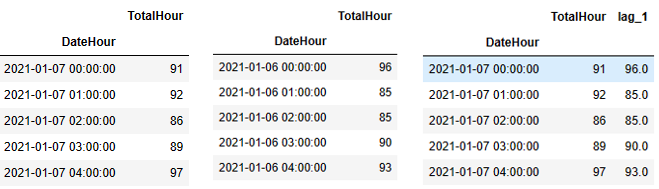

## 단계 4-1

prob3에 lag_1 ~ lag_6까지의 6개의 파생 변수를 추가하여 prob4를 만든다. 

prob4에 lag_1 ~ lag_6까지 하나라도 결측치가 있다면 삭제한다.

In [229]:
# shift를 사용하여 lag_1~6 까지 가져옵니다.
df_prob4 = pd.concat(
    [df_prob3] +
    [df_prob3['TotalHour'].shift(24 * i).rename('lag_{}'.format(i)) for i in range(1, 7)], 
    axis=1
).dropna()
df_prob4.head()

,15분,30분,45분,60분,DayName,Hour,AM,Weekend_yn,Holiday_yn,Avg,...,공장인원,인건비,target,target_,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
DateHour,,,,,,,,,,,,,,,,,,,,,
2021-01-07 00:00:00,22,22,22,25,3,0,0,0,0,22.75,...,0.000000,1.5,252.0,252.0,96.0,96.0,271.0,88.0,253.0,245.0
2021-01-07 01:00:00,26,22,22,22,3,1,0,0,0,23.00,...,0.369565,1.5,396.0,396.0,85.0,85.0,432.0,99.0,418.0,418.0
2021-01-07 02:00:00,22,21,21,22,3,2,0,0,0,21.50,...,0.000000,1.5,411.0,411.0,85.0,85.0,439.0,88.0,415.0,415.0
2021-01-07 03:00:00,22,22,22,23,3,3,0,0,0,22.25,...,0.629213,1.5,398.0,398.0,90.0,90.0,426.0,88.0,421.0,421.0
2021-01-07 04:00:00,22,26,26,23,3,4,0,0,0,24.25,...,2.865979,1.5,420.0,420.0,93.0,93.0,435.0,95.0,427.0,427.0


In [280]:
# 참고용 코드: Rolling 과 Shift
# Rolling 이전 6개의 TotalHour 평균을 가져 옵니다.
df_prob3['TotalHour'].rolling(6, min_periods=1, center=False, closed='left').mean()

DateHour
2021-01-01 00:00:00    245.000000
2021-01-01 01:00:00    331.500000
2021-01-01 02:00:00    359.333333
2021-01-01 03:00:00    374.750000
2021-01-01 04:00:00    385.200000
                          ...    
2021-09-13 19:00:00    631.166667
2021-09-13 20:00:00    591.833333
2021-09-13 21:00:00    561.833333
2021-09-13 22:00:00    518.833333
2021-09-13 23:00:00    502.500000
Name: TotalHour, Length: 6144, dtype: float64

In [281]:
# rolling에는 버그가 있어 closed가 작동하지 않을 수 있습니다.(위에서는 정상 작동)
# 그럴 경우를 대비해서 다른 방법으로 구하면, 바로 shift를 통해서 구할 수 있습니다.
pd.concat([df_prob3['TotalHour'].shift(i) for i in range(1, 7)], axis=1).mean(axis=1)

DateHour
2021-01-01 00:00:00           NaN
2021-01-01 01:00:00    245.000000
2021-01-01 02:00:00    331.500000
2021-01-01 03:00:00    359.333333
2021-01-01 04:00:00    374.750000
                          ...    
2021-09-13 19:00:00    655.000000
2021-09-13 20:00:00    631.166667
2021-09-13 21:00:00    591.833333
2021-09-13 22:00:00    561.833333
2021-09-13 23:00:00    518.833333
Length: 6144, dtype: float64

## 단계 4-2

학습용과 테스트용 데이터셋을 2021년 8월 14일 전과 이후로 분리

. prob4_train: DateHour 변수 기준으로 2021년 8월 14일 전(8월 14일 미포함) 데이터 (행의 수: 5256개)

. prob4_test: DateHour 변수 기준으로 2021년 8월 14일 이후(8월 14일 포함) 데이터 (행의 수: 744 개)

In [236]:
df_prob4_train = df_prob4.loc[df_prob4.index < '2021-08-14'].copy()
df_prob4_test = df_prob4.loc[df_prob4.index >= '2021-08-14'].copy()
df_prob4_train.shape, df_prob4_test.shape

((5256, 27), (744, 27))

## 단계 4-3

prob4_train에서 TotalHour와 lag_1~6 를 표준화하고, 

prob4_train의 표준화 설정으로 prob4_test의 TotalHour와 lag_1~6를 표준화한다.


---
**함수가이드**

sklearn.preprocessing  제공 기능 활용

문제 지시 사항 외 Default 값 사용

---

In [238]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
lag_cols = ['lag_{}'.format(i) for i in range(1, 7)]
std_cols = ['TotalHour'] + lag_cols
df_prob4_train[std_cols] = std_scaler.fit_transform(df_prob4_train[std_cols])
df_prob4_test[std_cols] = std_scaler.transform(df_prob4_test[std_cols]) # train의 설정을 사용하는 것이니, transform을 씁니다.

In [243]:
# 참고용
# 다수의 파생변수를 추가할 때, DataFrame으로 데이터를 구성해야 합니다.
# index는 추가하는 DataFrame을 사용하도록 하는 것을 잊으면 안 됩니다.
df_prob4_train_ = df_prob4_train.copy()
df_prob4_train_[['{}_s'.format(i) for i in std_cols]] = \
    pd.DataFrame(std_scaler.fit_transform(df_prob4_train[std_cols]), index=df_prob4_train_.index)
df_prob4_train_.head()

,15분,30분,45분,60분,DayName,Hour,AM,Weekend_yn,Holiday_yn,Avg,...,lag_4,lag_5,lag_6,TotalHour_s,lag_1_s,lag_2_s,lag_3_s,lag_4_s,lag_5_s,lag_6_s
DateHour,,,,,,,,,,,,,,,,,,,,,
2021-01-07 00:00:00,22,22,22,25,3,0,0,0,0,22.75,...,-1.229322,-0.503977,-0.541597,-1.247928,-1.215293,-1.204448,-0.439178,-1.229322,-0.503977,-0.541597
2021-01-07 01:00:00,26,22,22,22,3,1,0,0,0,23.00,...,-1.181264,0.217507,0.215775,-1.243549,-1.263412,-1.252503,0.265173,-1.181264,0.217507,0.215775
2021-01-07 02:00:00,22,21,21,22,3,2,0,0,0,21.50,...,-1.229322,0.204389,0.202642,-1.269825,-1.263412,-1.252503,0.295797,-1.229322,0.204389,0.202642
2021-01-07 03:00:00,22,22,22,23,3,3,0,0,0,22.25,...,-1.229322,0.230625,0.228909,-1.256687,-1.241540,-1.230660,0.238924,-1.229322,0.230625,0.228909
2021-01-07 04:00:00,22,26,26,23,3,4,0,0,0,24.25,...,-1.198740,0.256861,0.255176,-1.221652,-1.228416,-1.217554,0.278297,-1.198740,0.256861,0.255176


## 단계 4-4

SVR 모델을 아래 요건에 3가지 커널(Kernel)로 prob4_train을 학습하고 

prob4_test로 성능을 측정한다. 

그 중 가장 좋은 성능을 보인 커널의 번호를 A(No.), 그 때의 성능을 B라고 한다.

성능 측정 지표: $MAE(Y, \hat{Y})=\frac{1}{n}\sum^n_{i=1}|y_i - \hat{y_i}|$

입력 변수: TotalHour, lag_1 ~ 6

대상 변수: target

커널함수:

1: $k(x_i,x_j)=\langle x_i,x_j \rangle$

2: $k(x_i,x_j)=(\gamma \langle x_i,x_j \rangle +1)^2,\gamma=0.1$

3: $k(x_i,x_j)=exp⁡(||-\gamma ||x_i-x_j||^2 ),\gamma=0.1$

 $\langle x,x' \rangle:x,x'$ 의 내적,$||x_i-x_j||^2$:L2-norm

----
**함수가이드**

sklearn.svm.SVR, C=10

문제 지시 사항 외 Default 값 사용

---


In [250]:
from sklearn.svm import SVR
# 반복문을 통한 최적화입니다
params = [
    {'kernel': 'linear'}, 
    {'kernel': 'poly', 'degree': 2, 'gamma': 0.1, 'coef0': 1},
    {'kernel': 'rbf', 'gamma': 0.1}
] 
lag_cols = ['lag_{}'.format(i) for i in range(1, 7)]
X_svr = ['TotalHour'] + lag_cols
scores = []
for param in params:
    reg_svr = SVR(**param, C=10)
    reg_svr.fit(df_prob4_train[X_svr], df_prob4_train['target'])
    score = mean_absolute_error(df_prob4_test['target'], reg_svr.predict(df_prob4_test[X_svr]))
    scores.append(score)
    print(param, score)

{'kernel': 'linear'} 32.88361068048479
{'kernel': 'poly', 'degree': 2, 'gamma': 0.1, 'coef0': 1} 32.04119565841312
{'kernel': 'rbf', 'gamma': 0.1} 30.017658858928023


In [278]:
reg_svr_prc = SVR(kernel='precomputed', C=10)
# Precomputed일 경우에는, 학습가 예측에 Kernel Matrix를 구해서 넘겨줘야 합니다.
reg_svr_prc.fit(
    df_prob4_train[X_svr].dot(df_prob4_train[X_svr].T), # Train set에 대한 Kernel Matrix(Linear Kernel)입니다.
    df_prob4_train['target']
) 
mean_absolute_error(
    reg_svr_prc.predict(
        df_prob4_test[X_svr].dot(df_prob4_train[X_svr].T) # Predict에 대한 Kernel Matrix입니다
    ), 
    df_prob4_test['target']
)

32.88361068048479

In [255]:
A = np.argsort(np.array(scores))[0] + 1
B = scores[A - 1]
A, B

(3, 30.017658858928023)

In [256]:
A + B

33.01765885892802

A + B 를 소수점 셋째 자리에서 반올림하여 둘째 자리까지 적으시오

**33.02**

## 단계 4-5, Optional

퍼셉트론 회귀모델을 다음과 같이 3가지 설정으로 prob4_train으로 학습하고, 

prob4_test로 성능을 측정한다. 

가장 좋은 성능을 보인 경우의 번호(No.) C, 그 때의 성능을 D라고 한다.


성능 측정 지표: $MAE(Y, \hat{Y})=\frac{1}{n}\sum^n_{i=1}|y_i - \hat{y_i}|$ 

입력 변수: TotalHour, lag_1 ~ 6

대상 변수: target

신경망 설정:

|No.|은닉층의 수|은닉층의 활성화 함수|
|---|---------|-------------|
|1|[8]|relu|
|2|[8, 4]|relu|
|3|[8, 4]|sigmoid|


---
**함수가이드**

sklearn.neural_network.MLPRegressor, 

learning_rate_init=0.05, random_state=123, max_iter=500

---

# 문제 5 ~15:50

info에서 기온, 풍속, 습도 강수량 데이터에서 이상치를 탐색하고자 한다.

## 단계 5-1

info1에서 기온, 풍속, 습도, 강수량 만을 떼어 weather1 데이터프레임을 만든다.

In [285]:
X_5 = ['기온', '풍속', '습도', '강수량']
df_weather1 = df_info1[X_5].copy()
df_weather1.head()

,기온,풍속,습도,강수량
0,-3.2,2.4,71,0.0
1,-4.5,1.5,77,0.0
2,-3.9,2.6,58,0.0
3,-4.1,2.6,56,0.0
4,-4.6,2.6,60,0.0


## 단계 5-2

weather1의 기온, 풍속, 습도, 강수량을 표준화 한다.


In [286]:
from sklearn.preprocessing import StandardScaler

df_weather1[X_5] = StandardScaler().fit_transform(df_weather1[X_5])
df_weather1.head()

,기온,풍속,습도,강수량
0,-2.085903,0.289680,0.039195,-0.233447
1,-2.227830,-0.483098,0.300129,-0.233447
2,-2.162325,0.461409,-0.526162,-0.233447
3,-2.184160,0.461409,-0.613140,-0.233447
4,-2.238748,0.461409,-0.439184,-0.233447


## 단계 5-3

DBSCAN 군집화를 입실론(epsilon) 반경을 0.5, 주변 영역에 포함하는 최소 샘플수를 7로하여 군집화를 수행 한다. 

weather1에 DBSCAN 결과에서 소속 군집이 없는 샘플들을 이상점으로 간주한다. 

이상점 여부를 파생변수 outlier_dbscan로 하여 weather1에 추가한다. (소속 군집이 있으면: False, 없으면 True)

  입력변수: 기온, 풍속, 습도, 강수량

---
**함수가이드**

sklearn.cluster.DBSCAN, algorithm=’brute’

문제 지시 사항 외 Default 값 사용

---


In [289]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.5, #입실론(epsilon) 반경을 0.5
    min_samples=7, #주변 영역에 포함하는 최소 샘플수를 7
    algorithm='brute'
)
dbscan.fit(df_weather1[X_5])

DBSCAN(algorithm='brute', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [293]:
df_weather1['outlier_dbscan'] = dbscan.labels_ == -1
df_weather1.head()

,기온,풍속,습도,강수량,outlier_dbscan
0,-2.085903,0.289680,0.039195,-0.233447,False
1,-2.227830,-0.483098,0.300129,-0.233447,False
2,-2.162325,0.461409,-0.526162,-0.233447,False
3,-2.184160,0.461409,-0.613140,-0.233447,False
4,-2.238748,0.461409,-0.439184,-0.233447,False


## 단계 5-4

IsolationForest를 사용하여 weather1의 이상점을 탐색한다. 

학습시 bootstrapping은 하지 않고, 트리의 수는 30개를 사용한다. 

IsolationForest으로 탐지한 이상점 여부는 파생변수 outlier_isof로 하여 weather1에 추가한다. (이상치라면 True, 아니면 False)

입력변수: 기온, 풍속, 습도, 강수량

---
**함수가이드**

sklearn.ensemble.IsolationForest, random_state=123, contamination=’auto’, behaviour=’auto’

문제 지시 사항 외 Default 값 사용

---



In [299]:
from sklearn.ensemble import IsolationForest
isof = IsolationForest(
    n_estimators=30, # 트리의 수는 30개를 사용한다.
    contamination='auto', 
    behaviour='auto',
    random_state=123,
    bootstrap=False # 학습시 bootstrapping은 하지 않고
)
df_weather1['outlier_isof'] = isof.fit_predict(df_weather1[X_5]) == -1
df_weather1['outlier_isof'].value_counts()

False    5060
True     1108
Name: outlier_isof, dtype: int64

## 단계 5-5

LocalOutlierFactor를 사용하여 weather1의 이상점을 탐색한다. 

관찰할 주변의 샘플은 10개이다. 그리고, 샘플간의 거리는 유클리디언 거리를 사용한다. 

LocalOutlierFactor로 탐지한 이상 여부를 outlier_lof로 하여 weather1에 추가한다.

입력변수: 기온, 풍속, 습도, 강수량

---
**함수가이드**

sklearn.neighbors.LocalOutlierFactor, contamination=’auto’

---

In [307]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(
    n_neighbors=10, # 관찰할 주변의 샘플은 10개이다
    metric='minkowski', p = 2, # 그리고, 샘플간의 거리는 유클리디언 거리를 사용한다.
    contamination='auto'
)
df_weather1['outlier_lof'] = lof.fit_predict(df_weather1[X_5]) == -1
df_weather1['outlier_lof'].value_counts()

False    6085
True       83
Name: outlier_lof, dtype: int64

## 단계 5-6 

outlier_dbscan가 True인 행의 개수를 A, outlier_isof가 True인 행의 개수 B
,  outlier_lof가 True인 행의 개수 C 이다.


In [309]:
A, B, C = df_weather1[['outlier_dbscan', 'outlier_isof', 'outlier_lof']].sum()
A, B, C

(210, 1108, 83)

## 단계 5-7

outlier_dbscan, outlier_isof 그리고 outlier_lof 모두가 True인 행의 개수는 D이다.

In [310]:
D = df_weather1[['outlier_dbscan', 'outlier_isof', 'outlier_lof']].all(axis=1).sum()
D

16

In [311]:
A, B, C, D, A + B + C + D

(210, 1108, 83, 16, 1417)

A + B + C + D를 적는다.

# 문제 6

(kaggle 형 문제) prob4 를 바탕으로 아래 데이터셋을 만든다.

. prob6_train: DateHour 변수 기준으로 2021년 8월 14일 전(8월 14일 미포함) 데이터 (행의 수: 5256개)

. prob6_test: DateHour 변수 기준으로 2021년 8월 14일 이후(8월 14일 포함) 데이터 (행의 수: 744 개)

일 때, prob6_train으로 target을 예측하는 모델을 만들어, 

prob6_test의 target에 대한 MAE를 최소화하는 모델을 만든다. 

prob6_test의 예측 결과를 아래와 같은 형식으로 출력한다. 파일명은 answer6.csv 이다.

|DateHour|TotalHour|
|--------|---------|
|2021-08-14 00:00:00|102.607580|
|2021-08-14 01:00:00|94.078890|
....

In [312]:
# 풀이는 sec_ds_lv3_prob3_kaggle에서 계속됩니다